# Métricas: Acurácia e Matriz de Confusão


In [128]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# ignora os warnings 
import warnings
warnings.filterwarnings("ignore")
# Por se tratar de um conjunto de gráficos menores, pode ser mais interessante gerar os gráficos em janela separada
%matplotlib inline

# Aprendizado Supervisionado: Algoritmos de Classificação

Não há como saber qual algoritmo vai funcionar melhor na construção do modelo, antes de realizar os testes do algoritmo com os dados de testes do </i>dataset</i>. 

O ideal é testar alguns algoritmos e então escolher aquele que fornece melhor nível de precisão. 

Para isso, serão considerados os algoritmos de classificação:

1) <i>K-Nearest Neighbors</i> (KNN)<br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

2) Árvore de Decisão (CART - <i>Classification and Regression Trees</i>) <br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.

3) Regressão Logística <br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.

4) Naïve Bayes<br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.

5) Máquinas de Vetores de Suporte (SVMs - <i>Support Vector Machines</i>)<br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.

6) Random Forest<br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.

7) AdaBoost<br />
Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html.

Todos os sete algoritmos serão utilizados juntos com os mesmos dados de treino e teste.

A métrica de comparação utilizada será acurácia.

### Dados de Treino e de Teste

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Este é o método mais utilizado para avaliar performance de um algoritmo de Machine Learning. 

Dividimos nossos dados originais em dados de treino e de teste. 

Treinamos o algoritmo nos dados de treino e fazemos as previsões nos dados de teste e avaliamos o resultado. 

A divisão dos dados vai depender do seu dataset, mas utiliza-se com frequência tamanhos entre 70/30 (treino/teste) e 65/35 (treino/teste).

Este método é bem veloz e ideal para conjuntos de dados muito grandes. 

O ponto negativo é a possibilidade de alta variância.

## Avaliando a Performance


As métricas que você escolhe para avaliar a performance do modelo vão influenciar a forma como a performance é medida e comparada com modelos criados com outros algoritmos.

Vamos utilizar o mesmo algoritmo, mas com métricas diferentes e assim comparar os resultados. 

### Métricas para Algoritmos de Classificação

Documentação: https://scikit-learn.org/stable/modules/model_evaluation.html.

In [137]:
# Import dos módulos
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Importando os módulos dos algoritmos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [138]:
# Leitura do arquivo CSV com separador "," e codificação UTF-8
# diabetes é o nome de uma variável que receberá o conteúdo
diabetes = pd.read_csv('arquivo.csv', sep = ';', encoding = 'UTF-8')

In [139]:
# Obtém os dados 
array = diabetes.values

In [140]:
# Separando o array em componentes de entrada (atributos preditivos) e output (atributo alvo)
X = array[:,0:19] # Atributos Preditores selecionados de 0 a 19 (exclusivo)
Y = array[:,19] # Atributo alvo: portador de diabetes (1 - sim, 0 - não)

In [141]:
# Definindo o tamanho das amostras
teste_size = 0.33

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

In [142]:
# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

In [143]:
# Preparando a lista de modelos instanciados
modelos = []
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('LR', LogisticRegression()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC()))
modelos.append(('RFor', RandomForestClassifier()))
modelos.append(('AdaB', AdaBoostClassifier()))

In [144]:
# Avaliando cada modelo em um loop
dicAcuracia = {}
dicMatriz = {}
dicRelatorio = {}

for nome, modelo in modelos:
    # Treinamento do modelo
    modelo.fit(X_treino, Y_treino)
    # Fazendo as previsões e construindo a Matriz de Confusão
    previsoes = modelo.predict(X_teste)
    # Obtendo a matriz de confusão
    matrix = confusion_matrix(Y_teste, previsoes)
    # construindo o relatório de resultados
    report = classification_report(Y_teste, previsoes)
    # Score do modelo nos dados de teste  (Acurácia)
    acuracia = modelo.score(X_teste, Y_teste)
    # Criando dicionários para a acurácia matriz de confusão e relatório
    dicAcuracia[nome] = acuracia*100.0
    dicMatriz[nome] = matrix
    dicRelatorio[nome] = report

In [145]:
# Montando um dataframe com a acurácia obtida de cada modelo
pdAcuraciaModelos = pd.DataFrame(dicAcuracia.items())
pdAcuraciaModelos.columns = ['nome','acuracia']

In [146]:
# Apresenta a acurácia dos modelos ordenados
pdAcuraciaModelos.sort_values(ascending=False, by='acuracia')

,nome,acuracia
6,AdaB,86.087625
5,RFor,83.089931
4,SVM,82.475019
0,KNN,81.168332
2,LR,77.248271
1,CART,75.403536
3,NB,72.328978


In [147]:
# Apresenta a matriz de confusão para o Random Forest
dicMatriz['RFor']

array([[529, 109],
       [111, 552]], dtype=int64)

In [148]:
# Apresenta a matriz de confusão para o Random Forest
dicMatriz['AdaB']

array([[544,  94],
       [ 87, 576]], dtype=int64)

In [ ]:
# Apresenta a matriz de confusão para o Random Forest
dicMatriz['SVM']

In [ ]:
# Apresenta a matriz de confusão para o Random Forest
dicMatriz['KNN']

In [ ]:
# Apresenta a matriz de confusão para o Random Forest
dicMatriz['LR']

In [ ]:
# Apresenta a matriz de confusão para o Random Forest
dicMatriz['CART']

In [ ]:
# Apresenta a matriz de confusão para o Random Forest
dicMatriz['NB']

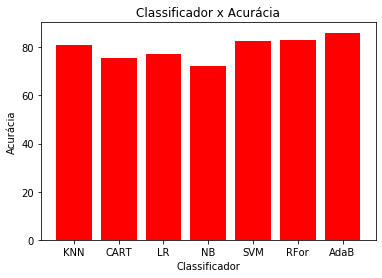

In [149]:
# Gráfico de barras para comparar a acurácia entre os modelos
plt.bar(list(dicAcuracia.keys()), dicAcuracia.values(), color='red')
# legenda do eixo x
plt.xticks(list(dicAcuracia.keys()))
# Label eixo Y
plt.ylabel('Acurácia')
# Label eixo X
plt.xlabel('Classificador')
# Título do gráfico
plt.title('Classificador x Acurácia')
# mostra o gráfico
plt.show()

### <font size = '2'>prof. Dr. Ivan Carlos Alcântara de Oliveira</font> - <font color="blue">https://orcid.org/0000-0002-6020-7535</font>